# Preparing Time Series Data

What is it?
- how we prepare the data specifically for time series data
- like most preparation processes, but with the addition of dates!

Why do we care?
- we want to ensure that pandas is properly aware of dates, so we can investigate trends over time

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Scenario: Working with store data to predict the sale_amount

## Acquire

In [7]:
#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [8]:
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_id        913000 non-null  int64  
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [11]:
df.isnull().sum()

item             0
sale_amount      0
sale_date        0
sale_id          0
store            0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
dtype: int64

In [12]:
df.shape

(913000, 16)

In [14]:
df.describe()

,item,sale_amount,sale_id,store,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,25.500000,5.160400,2.384688e+11,2.384688e+11,5.500000,78224.800000
std,14.430878,28.801144,263560.542223,2.872283,14.430878,2.737764,2.978005e+11,2.978005e+11,2.872283,16.479087
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,1.000000,78201.000000
25%,13.000000,30.000000,228250.750000,3.000000,13.000000,2.970000,3.367410e+10,3.367410e+10,3.000000,78217.000000
50%,25.500000,47.000000,456500.500000,5.500000,25.500000,5.195000,7.103651e+10,7.103651e+10,5.500000,78220.500000
75%,38.000000,70.000000,684750.250000,8.000000,38.000000,7.520000,6.030842e+11,6.030842e+11,8.000000,78232.000000
max,50.000000,231.000000,913000.000000,10.000000,50.000000,9.640000,8.846237e+11,8.846237e+11,10.000000,78253.000000


In [15]:
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


#### range of dates? 

In [16]:
df.sale_date.min()

'Fri, 01 Apr 2016 00:00:00 GMT'

In [17]:
df.sale_date.max()

'Wed, 31 May 2017 00:00:00 GMT'

In [18]:
df.sale_date.dtype

dtype('O')

item


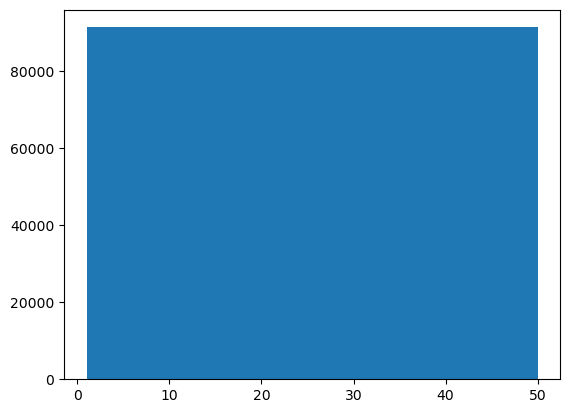

sale_amount


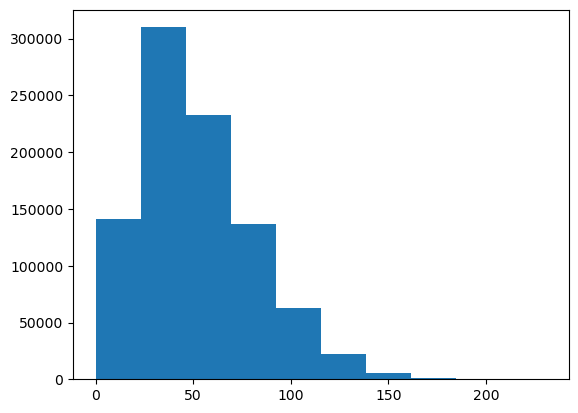

sale_date


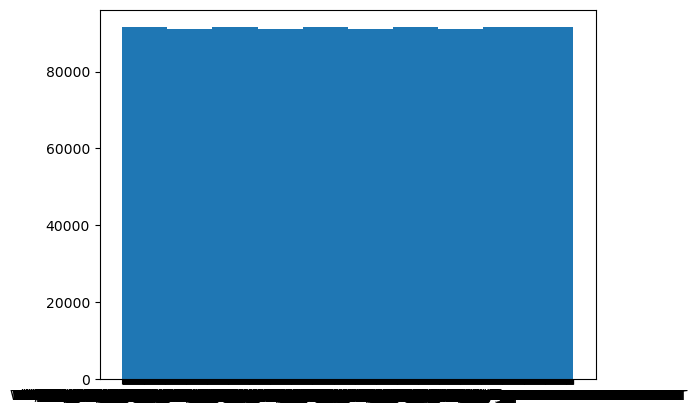

sale_id


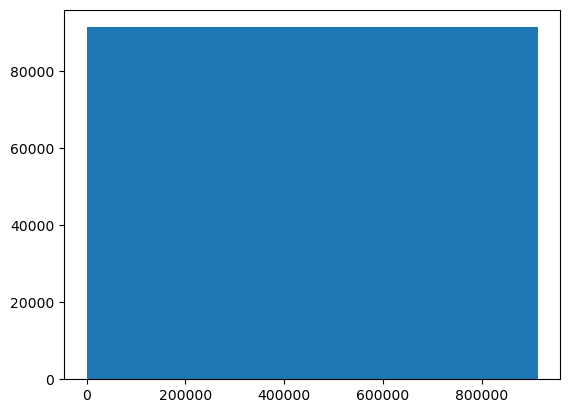

store


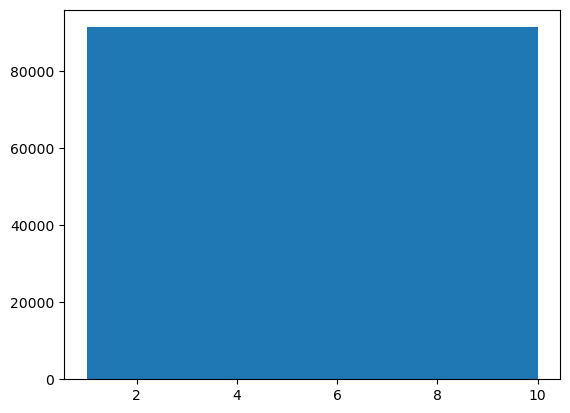

item_brand


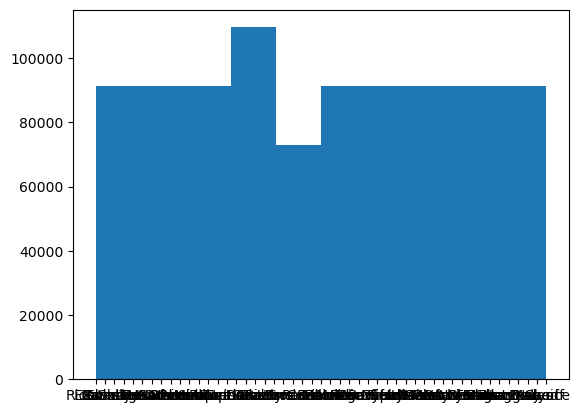

item_id


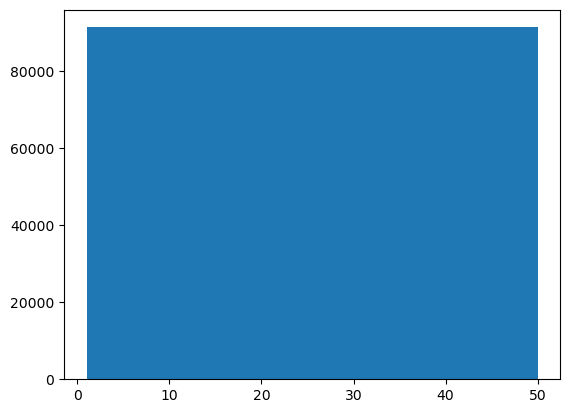

item_name


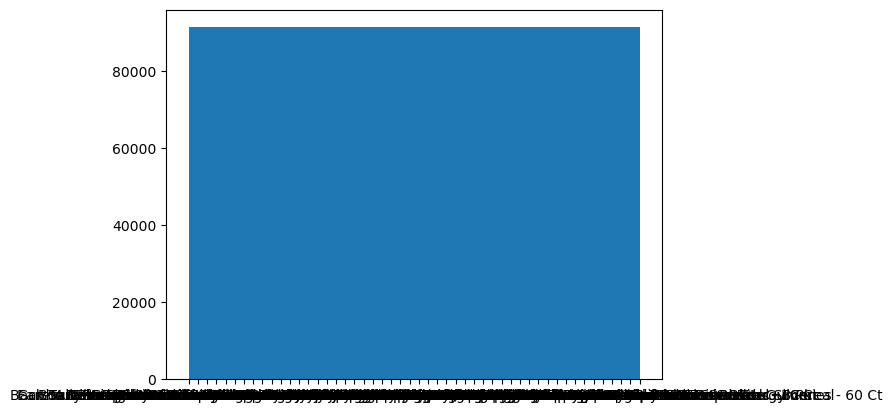

item_price


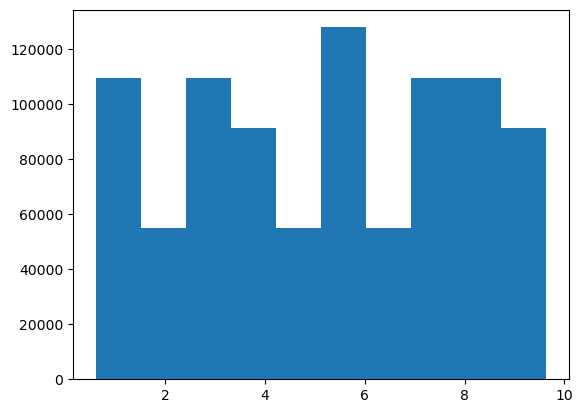

item_upc12


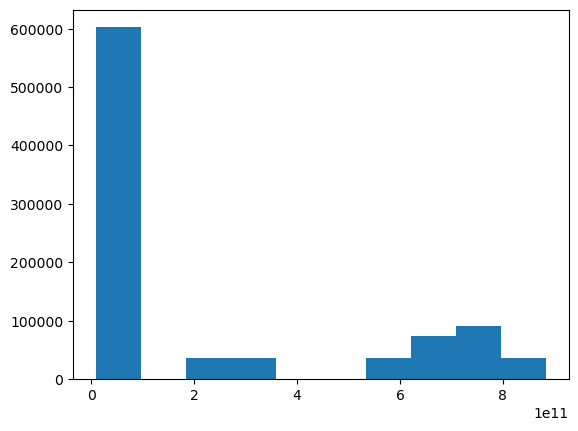

item_upc14


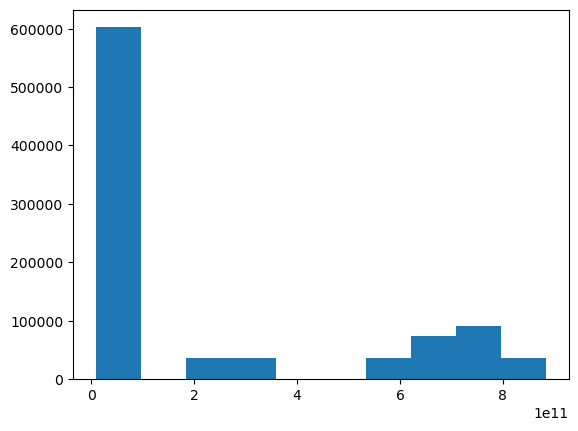

store_address


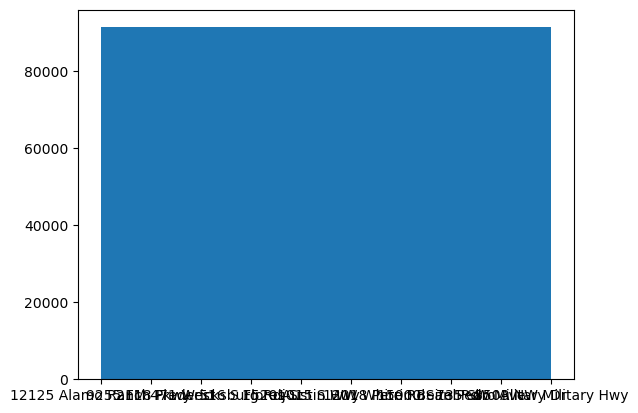

store_city


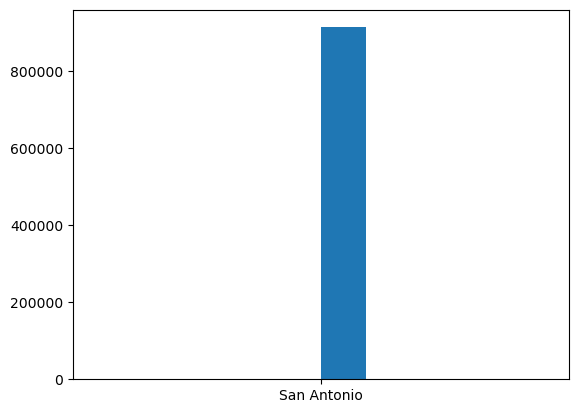

store_id


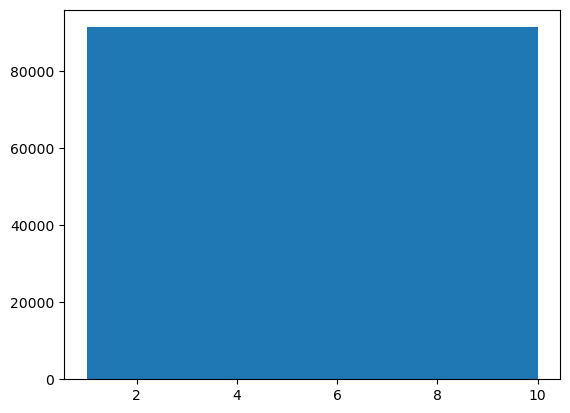

store_state


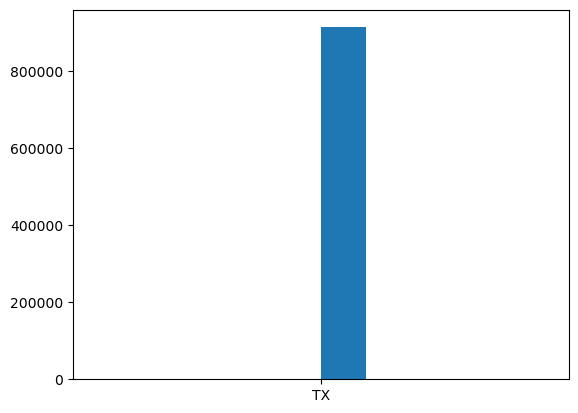

store_zipcode


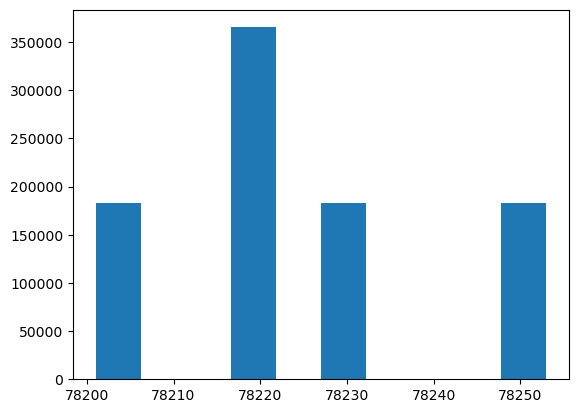

In [20]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

## Prepare

for time series data: 
- make pandas time aware
- look at the frequency of the data 
- look for gaps in time or null values
- get to know our data a litte better

### make pandas time aware

1. Convert 'date' column to datetime object
2. Set the datetime column as index
3. Sort the datetime index

formatting info: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

#### 1. Convert 'date' column to datetime object

In [24]:
# df.sale_date.astype('datetime64')

In [26]:
# pd.to_datetime(df.sale_date)

#### check for 00:00:00 GMT

In [50]:
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [51]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [52]:
df.sale_date.str.contains(' 00:00:00 GMT').sum()

913000

In [32]:
df.shape

(913000, 16)

In [53]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [54]:
df.sale_date[0]

'Tue, 01 Jan 2013'

In [55]:
df.sale_date = df.sale_date.str.strip()

In [58]:
df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [60]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')

In [61]:
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

#### 2. Set the datetime column as Index

In [63]:
df = df.set_index('sale_date')

In [64]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


#### 3. Sort the datetime index

In [66]:
df = df.sort_index()

In [67]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


### Frequency of data 
- how much data do we have for each date?

In [69]:
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

In [70]:
df.index.value_counts().value_counts()

500    1826
Name: sale_date, dtype: int64

### Check for gaps in time

In [71]:
#earliest day
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [72]:
#latest day
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [73]:
#difference between days plus one
df.index.max() - df.index.min()  + pd.Timedelta('1d')

Timedelta('1826 days 00:00:00')

In [74]:
#see how many unique days we actually have
df.index.nunique()

1826

In [77]:
#dropping days to show gaps in time
df_test = df.drop(index=['2017-12-30','2014-01-02','2016-03-28'])

In [78]:
#see how many unique days we actually have
df_test.index.nunique()

1823

In [81]:
#establish all the expected dates in our range
#pd.daterange()
expected_range = pd.date_range(start=df_test.index.min(), end=df_test.index.max())
expected_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [83]:
#find whats missing between dates
#df.difference()
expected_range.difference(df_test.index)

DatetimeIndex(['2014-01-02', '2016-03-28', '2017-12-30'], dtype='datetime64[ns]', freq=None)

## Let's get to know our data a litte better

Target variable: sale_amount

- understand what one row is & some of the important columns
- does the time frame of our rows make sense?
    - does it need to be more or less granular?
- investigate the data behind the unique combinations of store & item

### number of distinct stores? items? sales? sales_dates?

In [84]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [86]:
df.store_id.nunique()

10

In [88]:
df.item_id.nunique()

50

In [89]:
df.sale_id.nunique()

913000

In [90]:
df.index.nunique()

1826

### Is each store equally represented in this dataset?

In [91]:
df.store.value_counts()

1     91300
3     91300
10    91300
9     91300
2     91300
4     91300
6     91300
8     91300
7     91300
5     91300
Name: store, dtype: int64

### Is each item equally represented in this dataset?

In [94]:
df.item.value_counts().head()

1     18260
13    18260
16    18260
36    18260
15    18260
Name: item, dtype: int64

### Plot target variable over time

target_variable: sale_amount

In [96]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


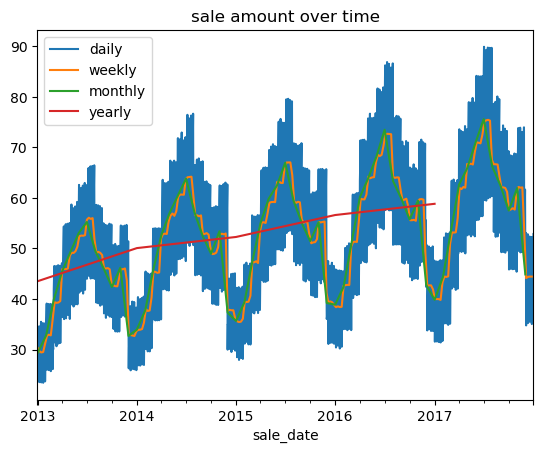

In [103]:
# plt.figure(figsize=(10,6))

df.resample('D').mean().sale_amount.plot(label='daily')
df.resample('W').mean().sale_amount.plot(label='weekly')
df.resample('M').mean().sale_amount.plot(label='monthly')
df.resample('Y').mean().sale_amount.plot(label='yearly')


plt.title('sale amount over time')
plt.legend()
plt.show()

### what's the first sale date for each store/item combination?

In [114]:
# df.groupby(['store','item']).index

In [115]:
df.reset_index().groupby(['store','item']).sale_date.min()

store  item
1      1      2013-01-01
       2      2013-01-01
       3      2013-01-01
       4      2013-01-01
       5      2013-01-01
                 ...    
10     46     2013-01-01
       47     2013-01-01
       48     2013-01-01
       49     2013-01-01
       50     2013-01-01
Name: sale_date, Length: 500, dtype: datetime64[ns]

In [116]:
df.reset_index().groupby(['store','item']).sale_date.min().value_counts()

2013-01-01    500
Name: sale_date, dtype: int64

### what's the last sale date for each store/item combination?

In [117]:
df.reset_index().groupby(['store','item']).sale_date.max()

store  item
1      1      2017-12-31
       2      2017-12-31
       3      2017-12-31
       4      2017-12-31
       5      2017-12-31
                 ...    
10     46     2017-12-31
       47     2017-12-31
       48     2017-12-31
       49     2017-12-31
       50     2017-12-31
Name: sale_date, Length: 500, dtype: datetime64[ns]

In [118]:
df.reset_index().groupby(['store','item']).sale_date.max().value_counts()

2017-12-31    500
Name: sale_date, dtype: int64

### how many different days were things sold for each store/item combination?

In [120]:
df.reset_index().groupby(['store','item']).sale_date.count()

store  item
1      1       1826
       2       1826
       3       1826
       4       1826
       5       1826
               ... 
10     46      1826
       47      1826
       48      1826
       49      1826
       50      1826
Name: sale_date, Length: 500, dtype: int64

In [121]:
df.reset_index().groupby(['store','item']).sale_date.count().value_counts()

1826    500
Name: sale_date, dtype: int64

In [122]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


## Data Splitting
Splitting time series data into train, test, and validate sets is a little trickier than with previous data we have looked at. Because the data points have an order to them, we cannot simply assign each point randomly to train, validate, or test.

Ideally all splits should contain one season's worth of data. There are several methods we can use to split our time series data:

- Human-based: use, for example, the last year in the dataset as test split
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit)

We'll explore data splitting in more depth in the next lesson.

